### Problem Statement - This is the Phase 4 of the Capstone Project, In this we are using webscrapped data from Booking.com to make two predictions - 

Price Prediction: This is a regression problem. The goal is to predict a continuous numerical value, which is the price of a hotel. In this case, we are using machine learning to estimate the price of hotels based on the features in the dataset. Appropriate models for this type of problem include regression models like Linear Regression, Decision Trees, Random Forest, Support Vector Regression, or even more advanced techniques like Gradient Boosting.

Review Score Prediction: This is a classification problem. The goal is to predict the category or class to which a review score belongs. In this case, the review scores are categorical, such as "Superb," "Very good," "Good," or "Pleasant." Classification models like Random Forest, Decision Trees, Logistic Regression, or Support Vector Machines can be used to predict the review scores.

### 1.Importing Neccessary Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2.Loading the Dataset

In [230]:
df = pd.read_excel('Booking.com Final.xlsx')

In [231]:
df.head()

,Hotel Name,City,Review,Number of Reviews,Review Score,Free WiFi,Family rooms,No-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
0,Resivation Hotel,Dubai,Very good,8497,8.3,1,0,1,1,0,0,0,Continental,Full English/Irish,Vegetarian,Superior King Room,0,1,7241
1,Millennium Place Barsha Heights Hotel,Dubai,8.3,3588,8.0,1,1,1,0,0,0,0,Continental,Vegetarian,Halal,Superior King Room,0,1,12024
2,IntercityHotel Dubai Jaddaf Waterfront,Dubai,Very good,4013,8.1,1,1,1,0,0,0,0,Continental,Gluten-free,Buffet,Superior Room Canal View Twin (Includes 15% Of...,1,0,9052
3,Grand Excelsior Hotel - Bur Dubai,Dubai,8.0,545,8.3,1,1,0,0,1,0,0,Continental,Asian,NaN,Deluxe Room with 25% off F&B,0,0,9480
4,"DAMAC Hills 2 Hotel, an Edge by Rotana Hotel",Dubai,Very good,3425,8.3,1,1,1,1,0,0,0,Continental,Vegetarian,NaN,Guest Room – King Bed,0,1,5751


In [232]:
df.shape

(1453, 19)

The Data set has 1453 rows and 19 columns

### 3.Exploratory Data Analysis

In [233]:
df.head()

,Hotel Name,City,Review,Number of Reviews,Review Score,Free WiFi,Family rooms,No-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
0,Resivation Hotel,Dubai,Very good,8497,8.3,1,0,1,1,0,0,0,Continental,Full English/Irish,Vegetarian,Superior King Room,0,1,7241
1,Millennium Place Barsha Heights Hotel,Dubai,8.3,3588,8.0,1,1,1,0,0,0,0,Continental,Vegetarian,Halal,Superior King Room,0,1,12024
2,IntercityHotel Dubai Jaddaf Waterfront,Dubai,Very good,4013,8.1,1,1,1,0,0,0,0,Continental,Gluten-free,Buffet,Superior Room Canal View Twin (Includes 15% Of...,1,0,9052
3,Grand Excelsior Hotel - Bur Dubai,Dubai,8.0,545,8.3,1,1,0,0,1,0,0,Continental,Asian,NaN,Deluxe Room with 25% off F&B,0,0,9480
4,"DAMAC Hills 2 Hotel, an Edge by Rotana Hotel",Dubai,Very good,3425,8.3,1,1,1,1,0,0,0,Continental,Vegetarian,NaN,Guest Room – King Bed,0,1,5751


In [234]:
df.tail()

,Hotel Name,City,Review,Number of Reviews,Review Score,Free WiFi,Family rooms,No-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
1448,Two Bedroom Apartment,Toronto,Review score,7,4.4,1,0,1,0,0,0,0,NaN,NaN,NaN,Two-Bedroom Apartment,0,1,12080
1449,"Crowne Plaza Toronto Airport, an IHG Hotel",Toronto,Fabulous,2,8.0,0,0,0,0,0,0,1,Continental,Vegetarian,Halal,Room Selected at Check-In,0,0,11655
1450,"Crowne Plaza Toronto Airport, an IHG Hotel",Toronto,Fabulous,2,8.0,0,0,0,0,0,0,1,Continental,Vegetarian,Halal,Room Selected at Check-In,0,0,11655
1451,Downtown Property,Toronto,Good,5,8.8,1,0,1,0,0,1,1,NaN,NaN,NaN,Two-Bedroom Apartment,0,1,12621
1452,Downtown Property,Toronto,Good,5,8.8,1,0,1,0,0,1,1,NaN,NaN,NaN,Two-Bedroom Apartment,0,1,12621


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotel Name           1453 non-null   object 
 1   City                 1453 non-null   object 
 2   Review               1453 non-null   object 
 3   Number of Reviews    1453 non-null   int64  
 4   Review Score         1453 non-null   float64
 5   Free WiFi            1453 non-null   int64  
 6   Family rooms         1453 non-null   int64  
 7   No-smoking rooms     1453 non-null   int64  
 8   Restaurant           1453 non-null   int64  
 9   Bar                  1453 non-null   int64  
 10  Heating              1453 non-null   int64  
 11  Lift                 1453 non-null   int64  
 12  Breakfast Cuisine 1  1024 non-null   object 
 13  Breakfast Cuisine 2  702 non-null    object 
 14  Breakfast Cuisine 3  528 non-null    object 
 15  Room Type            1453 non-null   o

In [236]:
df.dtypes

Hotel Name              object
City                    object
Review                  object
Number of Reviews        int64
Review Score           float64
Free WiFi                int64
Family rooms             int64
No-smoking rooms         int64
Restaurant               int64
Bar                      int64
Heating                  int64
Lift                     int64
Breakfast Cuisine 1     object
Breakfast Cuisine 2     object
Breakfast Cuisine 3     object
Room Type               object
Single Bed               int64
Double Bed               int64
Price                    int64
dtype: object

In [237]:
df.isnull().sum()

Hotel Name               0
City                     0
Review                   0
Number of Reviews        0
Review Score             0
Free WiFi                0
Family rooms             0
No-smoking rooms         0
Restaurant               0
Bar                      0
Heating                  0
Lift                     0
Breakfast Cuisine 1    429
Breakfast Cuisine 2    751
Breakfast Cuisine 3    925
Room Type                0
Single Bed               0
Double Bed               0
Price                    0
dtype: int64

The Dataset Contains Null Values and Need to be Handled

In [238]:
df['Breakfast Cuisine 1'] = df['Breakfast Cuisine 1'].fillna("Not Available")
df['Breakfast Cuisine 2'] = df['Breakfast Cuisine 2'].fillna("Not Available")
df['Breakfast Cuisine 3'] = df['Breakfast Cuisine 3'].fillna("Not Available")

In [239]:
df.isnull().sum()

Hotel Name             0
City                   0
Review                 0
Number of Reviews      0
Review Score           0
Free WiFi              0
Family rooms           0
No-smoking rooms       0
Restaurant             0
Bar                    0
Heating                0
Lift                   0
Breakfast Cuisine 1    0
Breakfast Cuisine 2    0
Breakfast Cuisine 3    0
Room Type              0
Single Bed             0
Double Bed             0
Price                  0
dtype: int64

#### All the Missing Values have been Handled

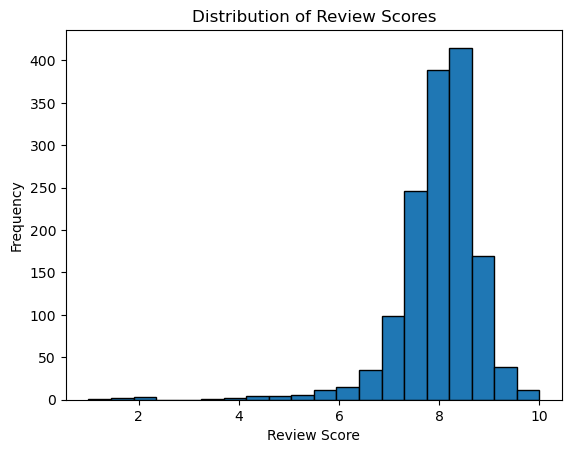

In [240]:
import matplotlib.pyplot as plt

plt.hist(df['Review Score'], bins=20, edgecolor='k')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()

#### Maximum Hotels in all the cities have Review Score of 7 and 8 , which shows Hotels offered by Booking.com are Good

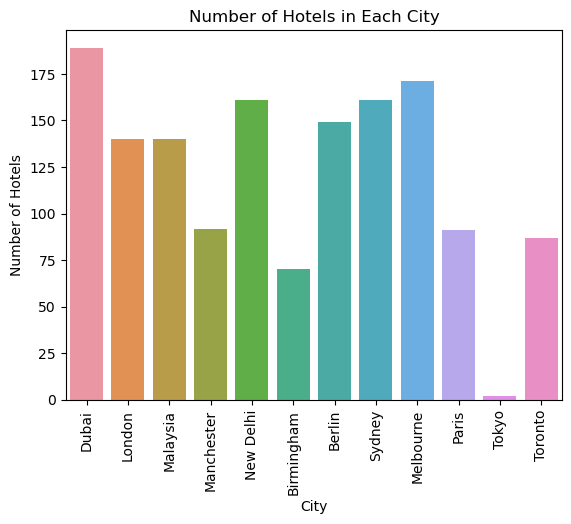

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='City')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Hotels')
plt.title('Number of Hotels in Each City')
plt.show()

#### Dubai has the Highest Number of Hotels offered on Booking.com

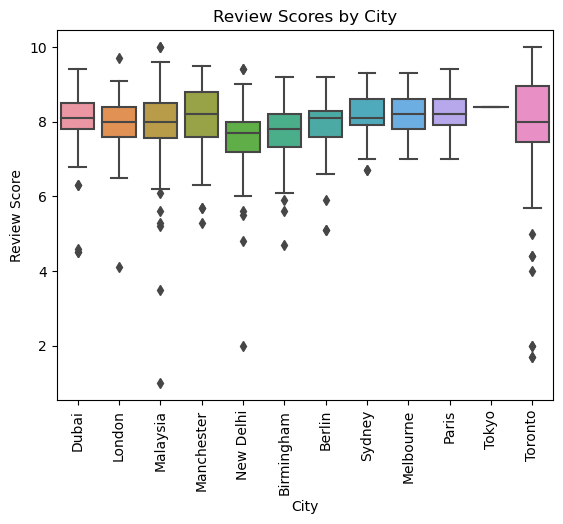

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='City', y='Review Score')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Review Score')
plt.title('Review Scores by City')
plt.show()

#### Review Scores are Mostly Similar for all the cities but varies little for Toronto
it also shows presence of Outliers which needs to managed

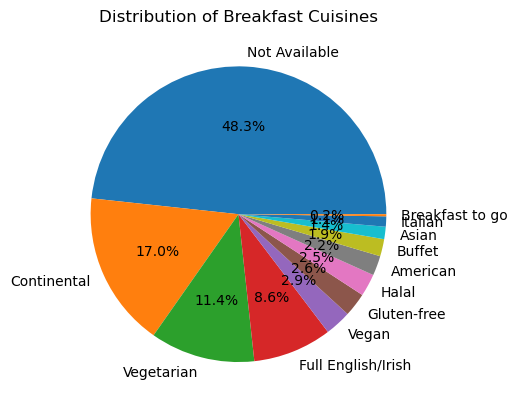

In [243]:
import matplotlib.pyplot as plt

cuisine_counts = df[['Breakfast Cuisine 1', 'Breakfast Cuisine 2', 'Breakfast Cuisine 3']].stack().value_counts()
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Breakfast Cuisines')
plt.show()

#### Continental and Vegetarian are the Most Popular Served Cuisines

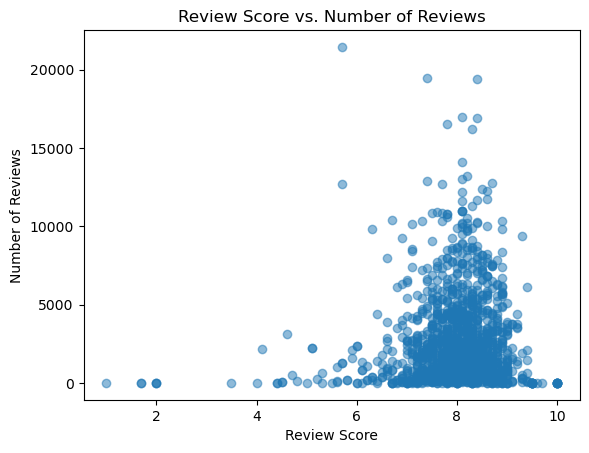

In [244]:
import matplotlib.pyplot as plt

plt.scatter(df['Review Score'], df['Number of Reviews'], alpha=0.5)
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Review Score vs. Number of Reviews')
plt.show()

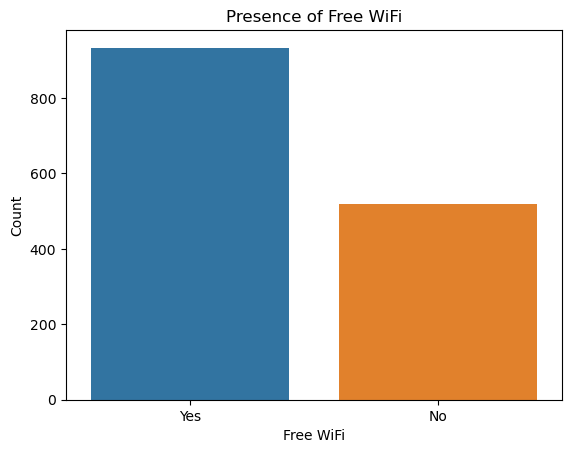

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'No', 1: 'Yes'}
df['Free WiFi'] = df['Free WiFi'].map(label_mapping)

sns.countplot(data=df, x='Free WiFi')
plt.xlabel('Free WiFi')
plt.ylabel('Count')
plt.title('Presence of Free WiFi')
plt.show()

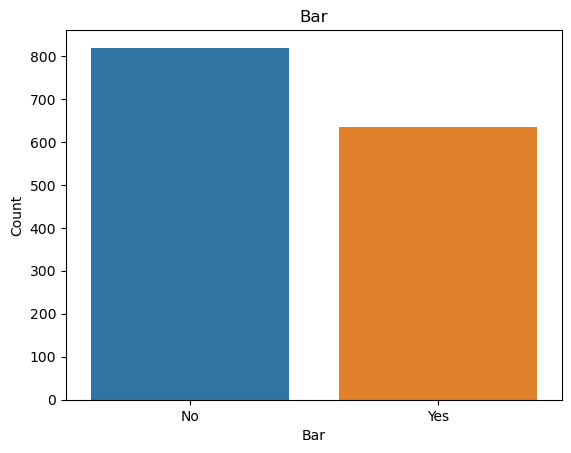

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'No', 1: 'Yes'}
df['Bar'] = df['Bar'].map(label_mapping)

sns.countplot(data=df, x='Bar')
plt.xlabel('Bar')
plt.ylabel('Count')
plt.title('Bar')
plt.show()

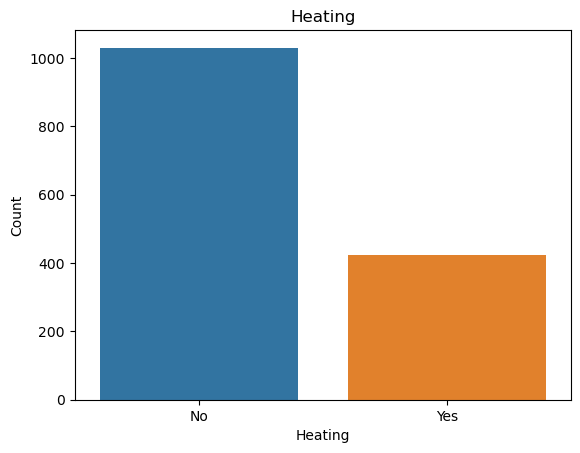

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'No', 1: 'Yes'}
df['Heating'] = df['Heating'].map(label_mapping)

sns.countplot(data=df, x='Heating')
plt.xlabel('Heating')
plt.ylabel('Count')
plt.title('Heating')
plt.show()

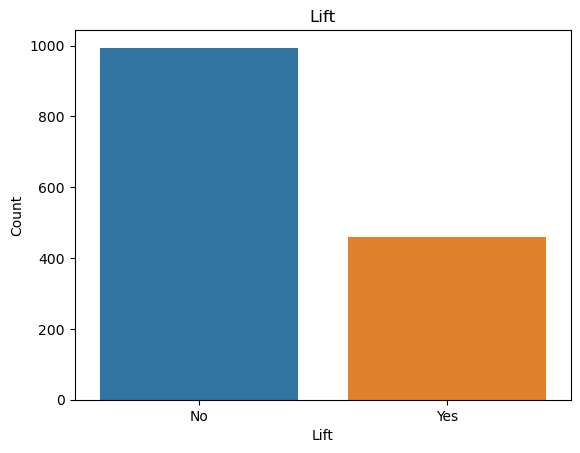

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'No', 1: 'Yes'}
df['Lift'] = df['Lift'].map(label_mapping)

sns.countplot(data=df, x='Lift')
plt.xlabel('Lift')
plt.ylabel('Count')
plt.title('Lift')
plt.show()

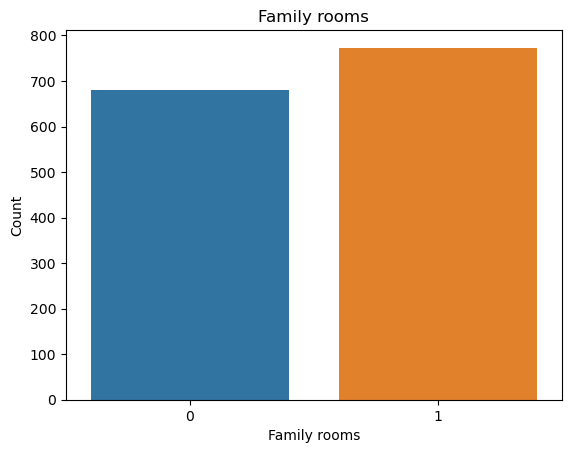

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'No', 1: 'Yes'}
df[''] = df['Family rooms'].map(label_mapping)

sns.countplot(data=df, x='Family rooms')
plt.xlabel('Family rooms')
plt.ylabel('Count')
plt.title('Family rooms')
plt.show()

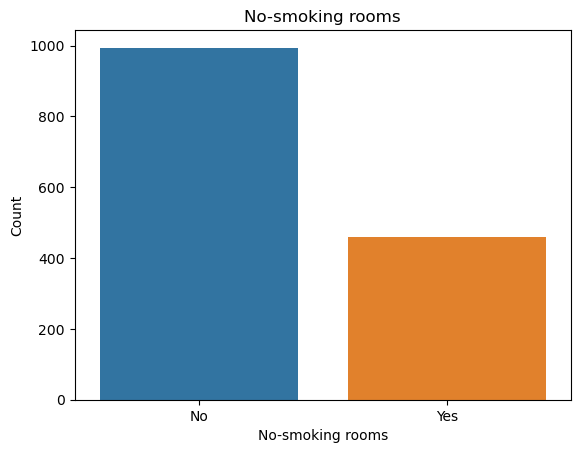

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'No', 1: 'Yes'}
df['No-smoking rooms'] = df['No-smoking rooms'].map(label_mapping)

sns.countplot(data=df, x='Lift')
plt.xlabel('No-smoking rooms')
plt.ylabel('Count')
plt.title('No-smoking rooms')
plt.show()

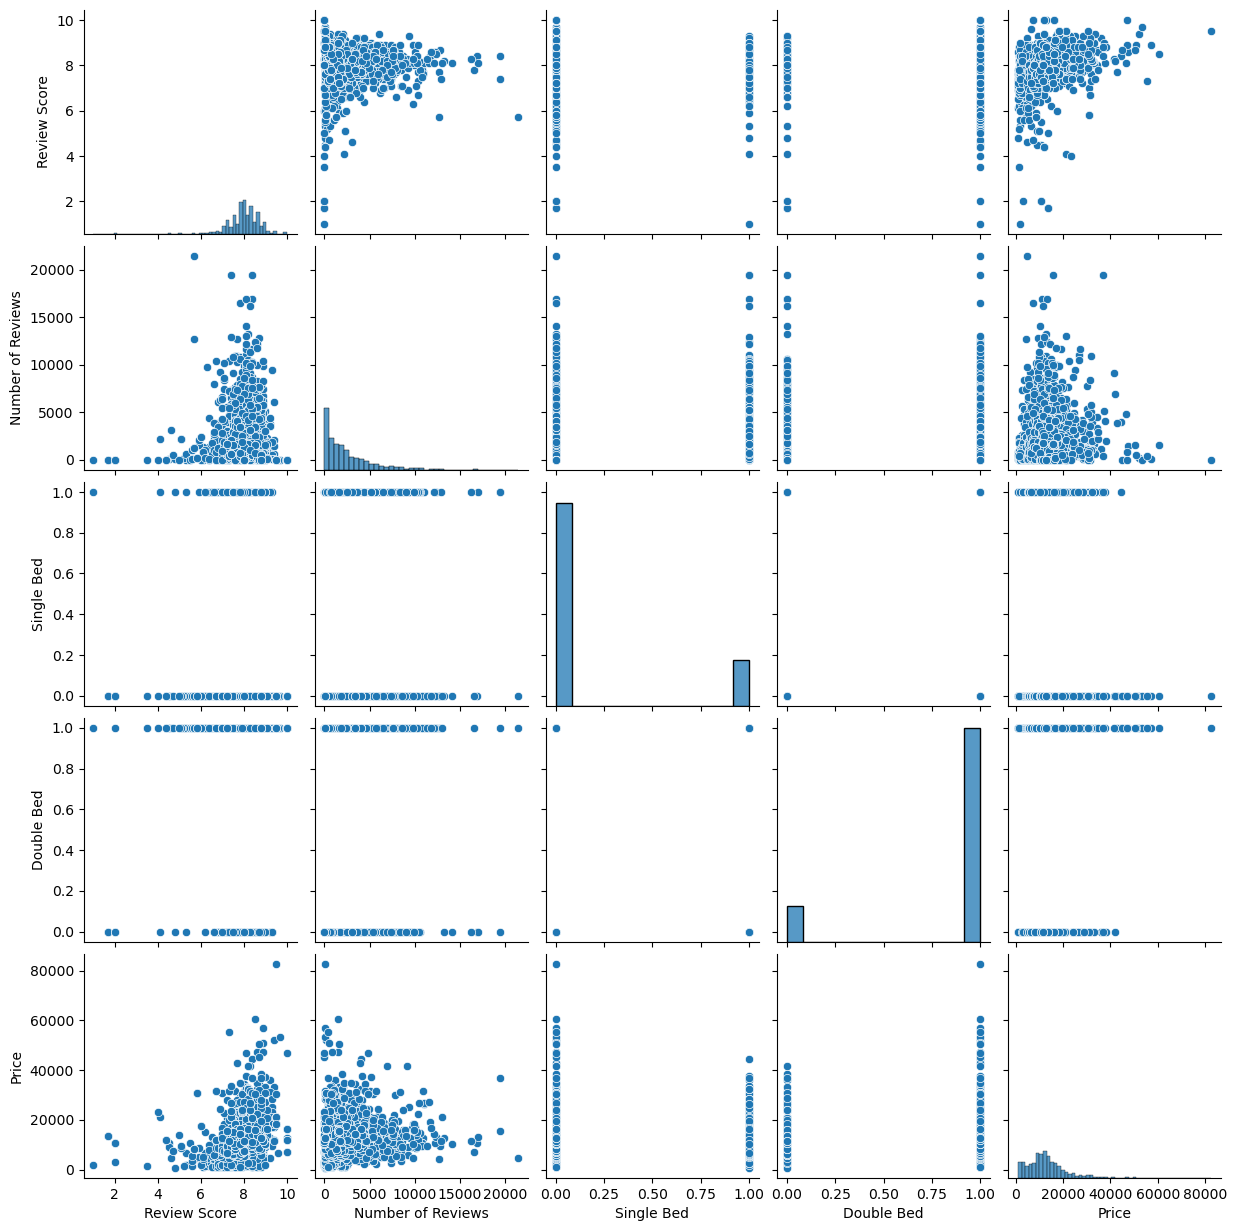

In [251]:
import seaborn as sns

sns.pairplot(df[['Review Score', 'Number of Reviews', 'Single Bed', 'Double Bed', 'Price']])
plt.show()

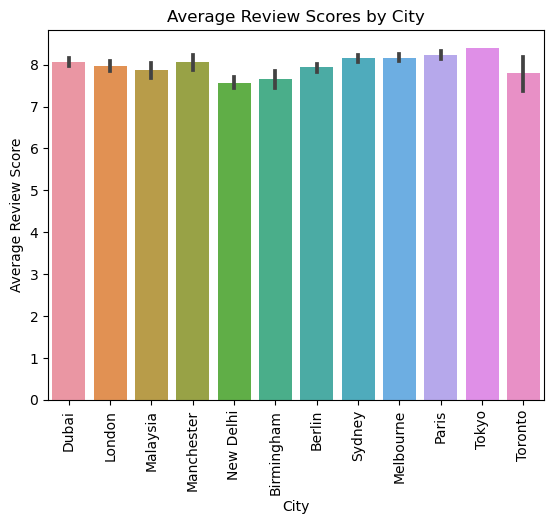

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='City', y='Review Score')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Review Score')
plt.title('Average Review Scores by City')
plt.show()

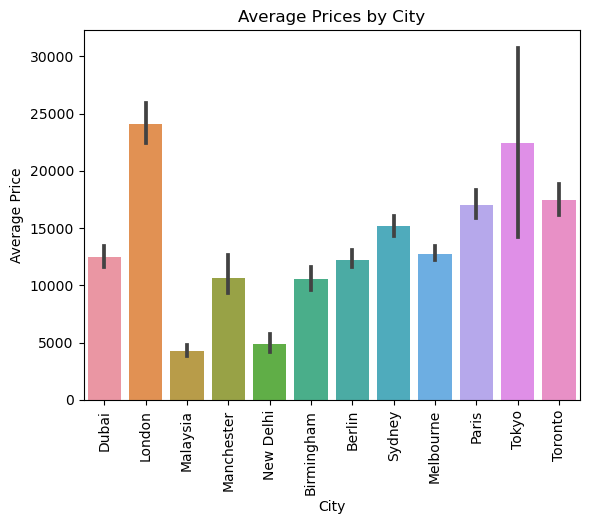

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='City', y='Price')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Prices by City')
plt.show()

### 4. Data Preprocessing

In [257]:
column_index = 19  # Replace with the index of the unnamed column you want to drop
df.drop(df.columns[column_index], axis=1, inplace=True)


In [258]:
df.dtypes

Hotel Name              object
City                    object
Review                  object
Number of Reviews        int64
Review Score           float64
Free WiFi               object
Family rooms             int64
No-smoking rooms        object
Restaurant               int64
Bar                     object
Heating                 object
Lift                    object
Breakfast Cuisine 1     object
Breakfast Cuisine 2     object
Breakfast Cuisine 3     object
Room Type               object
Single Bed               int64
Double Bed               int64
Price                    int64
dtype: object

In [259]:
df.columns

Index(['Hotel Name', 'City', 'Review', 'Number of Reviews', 'Review Score',
       'Free WiFi', 'Family rooms', 'No-smoking rooms', 'Restaurant', 'Bar',
       'Heating', 'Lift', 'Breakfast Cuisine 1', 'Breakfast Cuisine 2',
       'Breakfast Cuisine 3', 'Room Type', 'Single Bed', 'Double Bed',
       'Price'],
      dtype='object')

In [261]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lobject=['Hotel Name', 'City',
       'Free WiFi', 'Family rooms', 'No-smoking rooms', 'Restaurant', 'Bar',
       'Heating', 'Lift', 'Breakfast Cuisine 1', 'Breakfast Cuisine 2',
       'Breakfast Cuisine 3', 'Room Type', 'Single Bed', 'Double Bed']
for i in lobject:
    df[i]=le.fit_transform(df[i])

In [262]:
df.dtypes

Hotel Name               int64
City                     int64
Review                  object
Number of Reviews        int64
Review Score           float64
Free WiFi                int32
Family rooms             int64
No-smoking rooms         int32
Restaurant               int64
Bar                      int32
Heating                  int32
Lift                     int32
Breakfast Cuisine 1      int32
Breakfast Cuisine 2      int32
Breakfast Cuisine 3      int32
Room Type                int32
Single Bed               int64
Double Bed               int64
Price                    int64
dtype: object

In [263]:
df['Review Score'] = df['Review Score'].astype(int)

In [264]:
df.dtypes

Hotel Name              int64
City                    int64
Review                 object
Number of Reviews       int64
Review Score            int32
Free WiFi               int32
Family rooms            int64
No-smoking rooms        int32
Restaurant              int64
Bar                     int32
Heating                 int32
Lift                    int32
Breakfast Cuisine 1     int32
Breakfast Cuisine 2     int32
Breakfast Cuisine 3     int32
Room Type               int32
Single Bed              int64
Double Bed              int64
Price                   int64
dtype: object

In [266]:
df = df.drop(columns=['Review'])

In [267]:
df.dtypes

Hotel Name             int64
City                   int64
Number of Reviews      int64
Review Score           int32
Free WiFi              int32
Family rooms           int64
No-smoking rooms       int32
Restaurant             int64
Bar                    int32
Heating                int32
Lift                   int32
Breakfast Cuisine 1    int32
Breakfast Cuisine 2    int32
Breakfast Cuisine 3    int32
Room Type              int32
Single Bed             int64
Double Bed             int64
Price                  int64
dtype: object

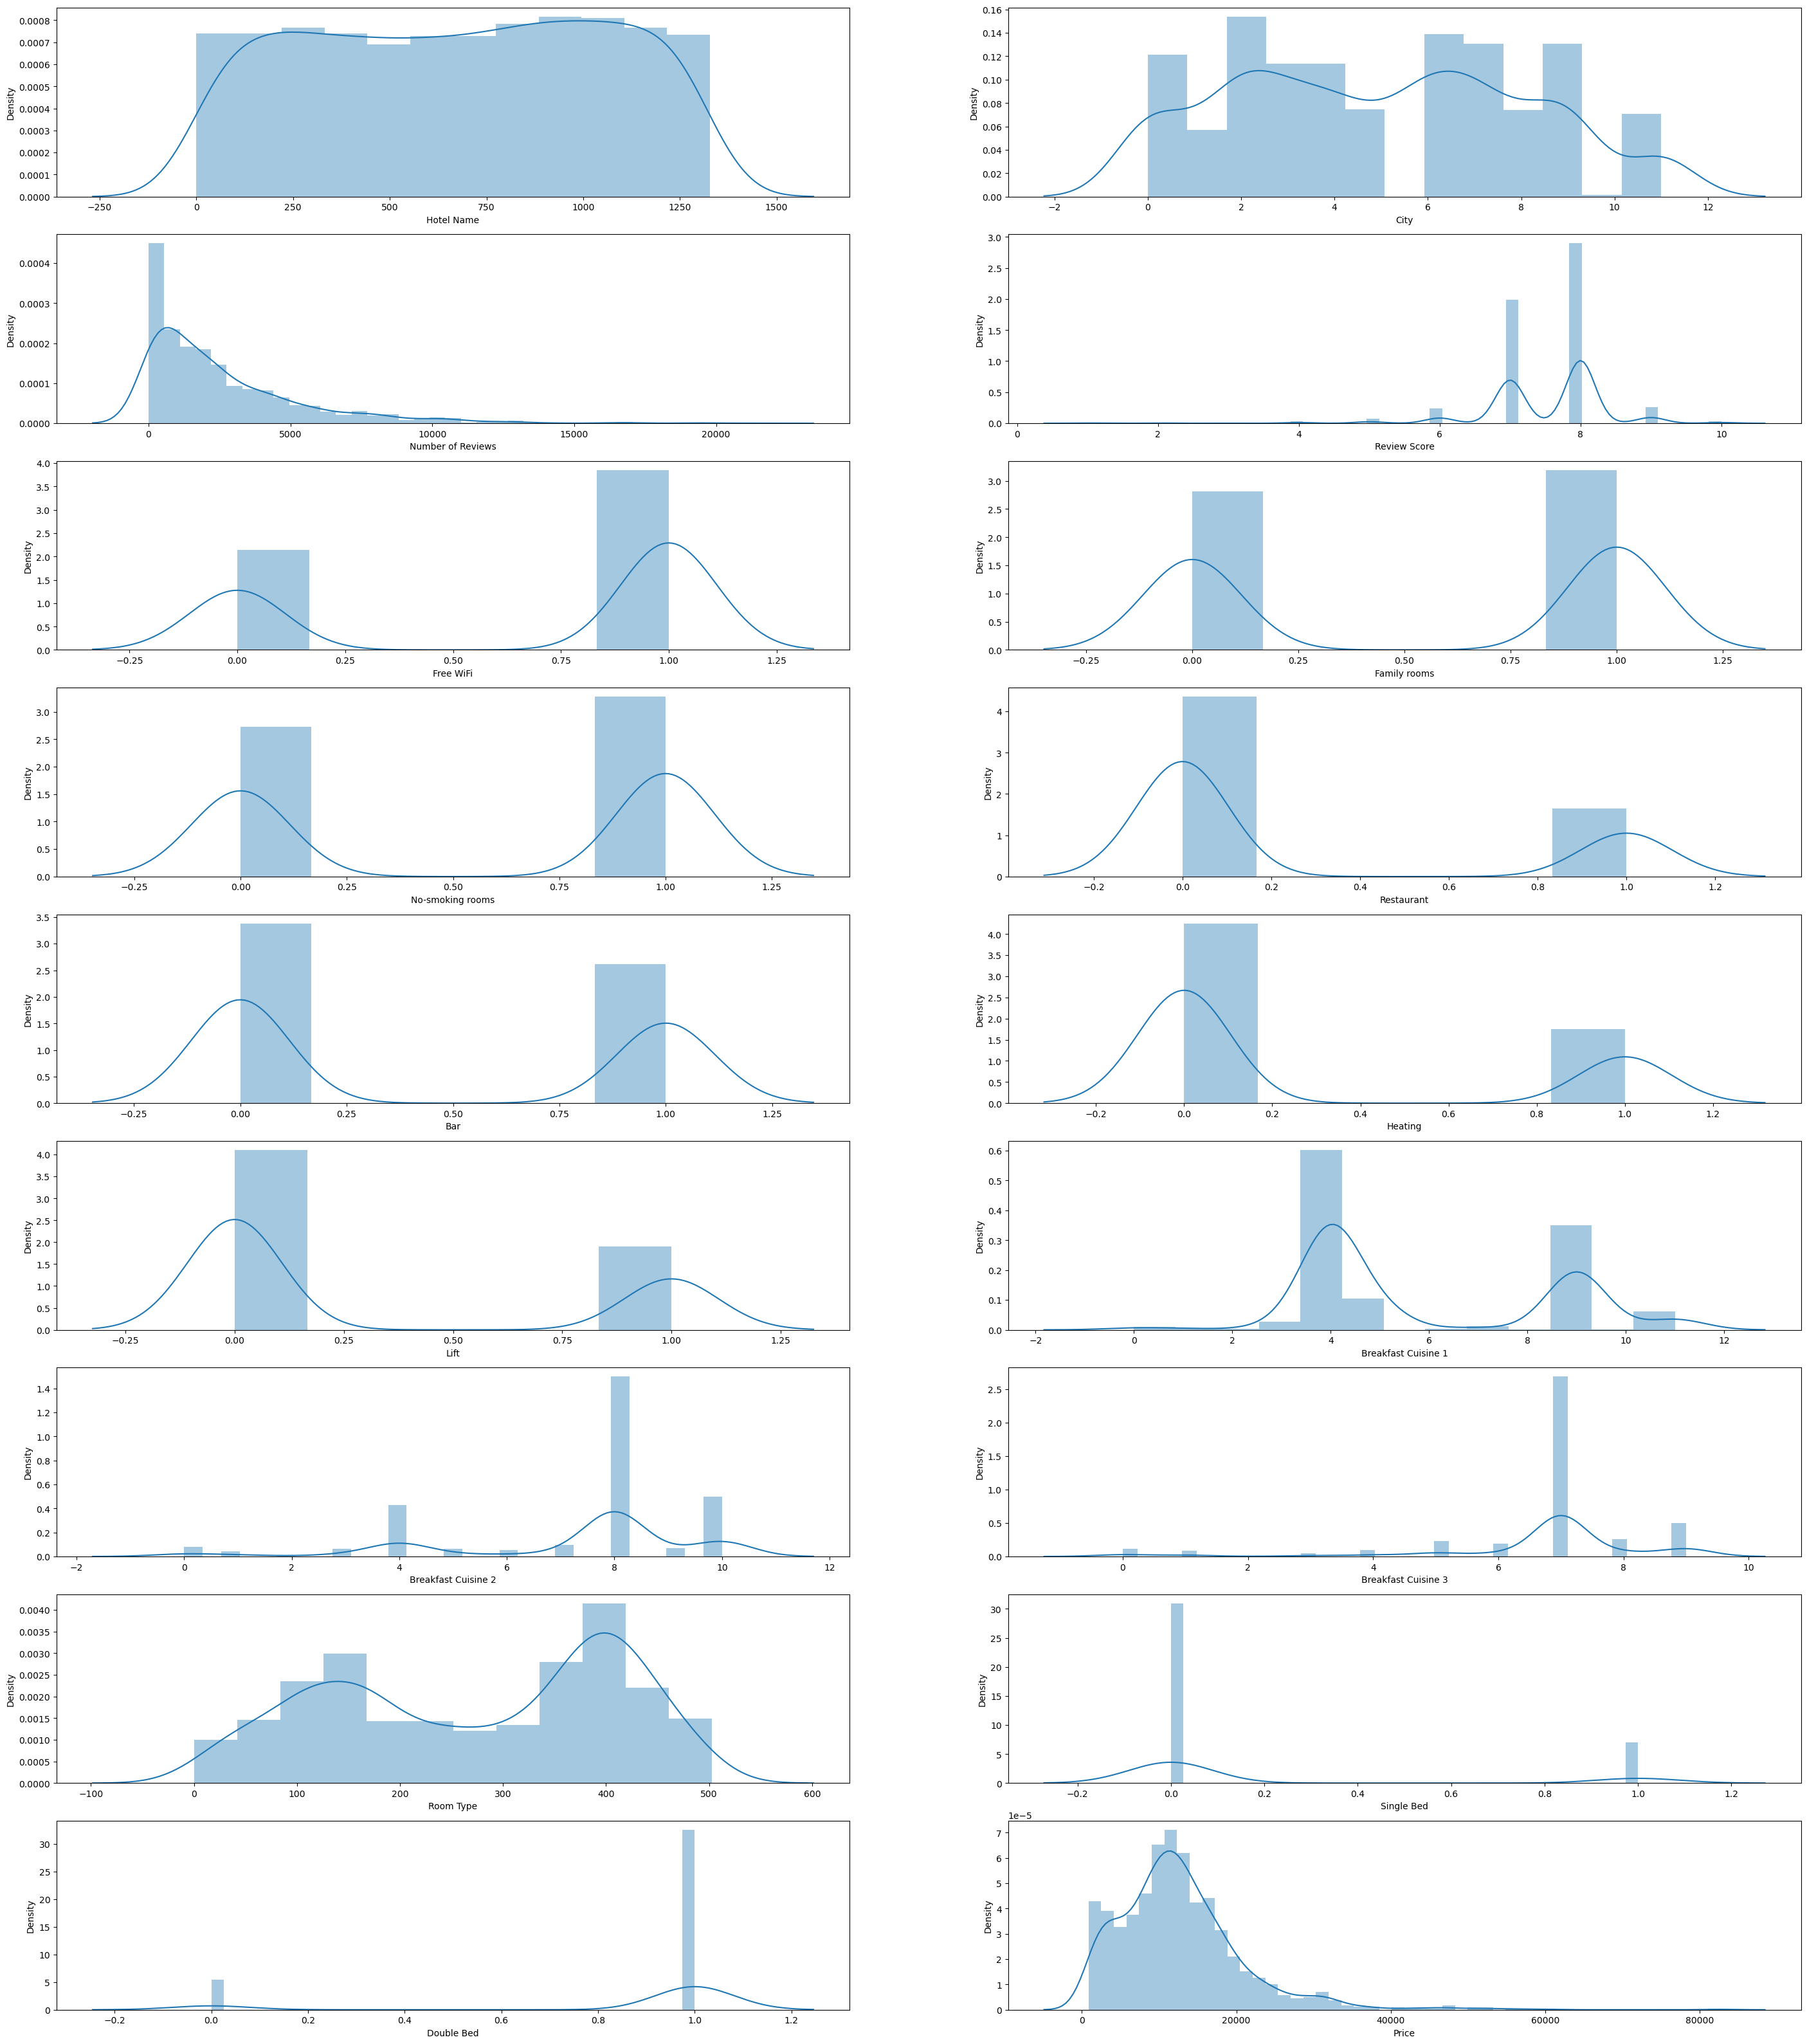

In [268]:
plt.figure(figsize=(35,45))
count =1
for column in df:
    if count <= 20:
        ax = plt.subplot(10,2,count)
        sns.distplot(df[column])
        plt.xlabel(column) 
    count+=1
plt.show()

In [269]:
df.describe()

,Hotel Name,City,Number of Reviews,Review Score,Free WiFi,Family rooms,No-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,670.506538,4.951824,2605.112870,7.522368,0.642120,0.532003,0.545767,0.273916,0.436339,0.291122,0.315898,5.902271,7.188575,6.705437,274.216105,0.185134,0.856160,12666.159670
std,383.699648,3.174735,2815.221976,0.883162,0.479542,0.499147,0.498072,0.446120,0.496101,0.454436,0.465033,2.612763,2.428925,1.798363,140.555025,0.388540,0.351049,8214.979343
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,849.000000
25%,334.000000,2.000000,580.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,7.000000,148.000000,0.000000,1.000000,7493.000000
50%,682.000000,5.000000,1717.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,8.000000,7.000000,296.000000,0.000000,1.000000,11705.000000
75%,1003.000000,7.000000,3714.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,7.000000,398.000000,0.000000,1.000000,16181.000000
max,1327.000000,11.000000,21460.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000,9.000000,503.000000,1.000000,1.000000,82706.000000


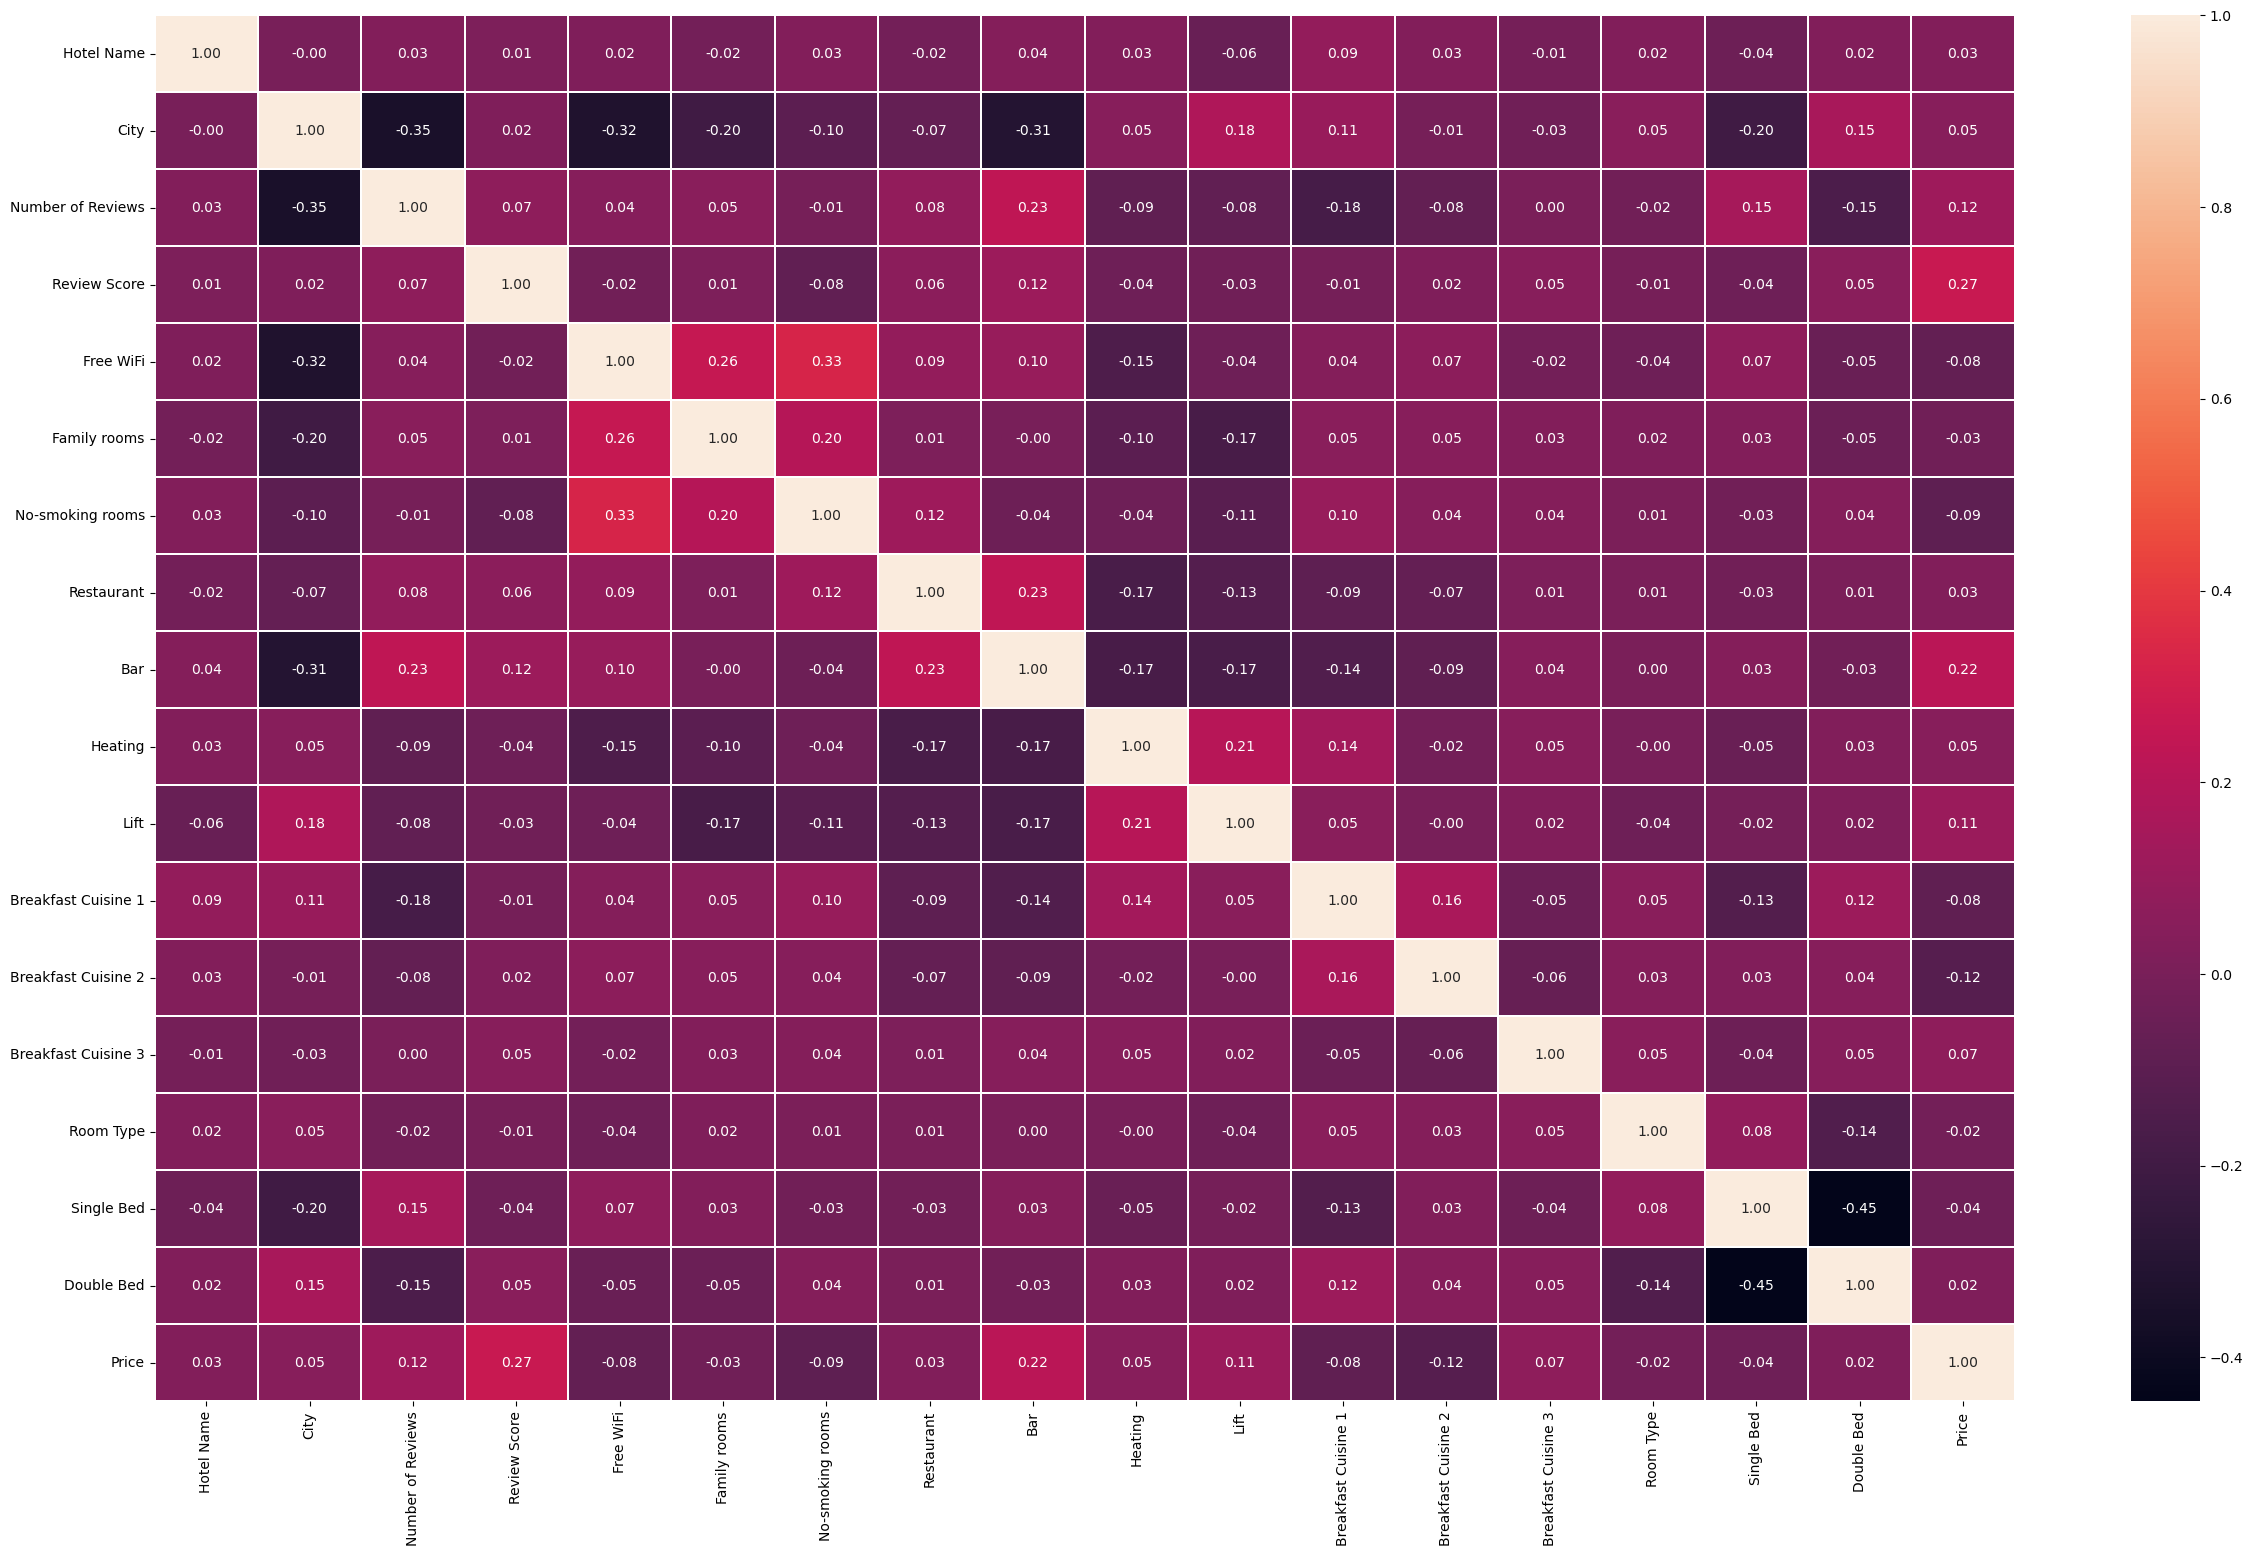

In [270]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [274]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([   8,   14,   16,   25,   26,   27,   47,   55,   56,   66,   79,
          80,   96,  100,  113,  121,  122,  123,  128,  154,  161,  172,
         173,  177,  181,  186,  190,  204,  206,  215,  231,  232,  239,
         240,  251,  268,  280,  284,  292,  295,  301,  312,  330,  331,
         336,  354,  362,  365,  382,  400,  406,  416,  436,  451,  457,
         459,  463,  469,  481,  482,  489,  521,  534,  541,  547,  565,
         591,  599,  604,  608,  614,  618,  624,  629,  648,  654,  656,
         667,  695,  698,  705,  708,  709,  717,  779,  795,  801,  804,
         813,  816,  829,  839,  882,  907,  919,  949,  951,  959, 1013,
        1016, 1100, 1109, 1173, 1195, 1264, 1285, 1293, 1295, 1307, 1321,
        1352, 1407, 1407, 1408, 1408, 1424, 1431, 1435, 1439, 1444, 1444,
        1445, 1446, 1447, 1448], dtype=int64),
 array([13, 13, 13, 13,  2, 13, 13, 13, 13, 13, 13, 13, 13,  2, 13, 13, 13,
        13,  3, 13,  2,  3,  3, 17, 13,  2, 17, 17, 17, 17, 17,

In [275]:
df_new=df[(z<3).all(axis=1)]

In [276]:
df_new.shape

(1331, 18)

In [277]:
df.shape

(1453, 18)

Loss of Data = 8.3%

In [278]:
df.skew()

Hotel Name            -0.042635
City                   0.127363
Number of Reviews      1.995634
Review Score          -1.969202
Free WiFi             -0.593549
Family rooms          -0.128407
No-smoking rooms      -0.184031
Restaurant             1.014954
Bar                    0.257000
Heating                0.920553
Lift                   0.792872
Breakfast Cuisine 1    0.513157
Breakfast Cuisine 2   -1.177762
Breakfast Cuisine 3   -2.067163
Room Type             -0.230360
Single Bed             1.622997
Double Bed            -2.031916
Price                  1.810953
dtype: float64

### Spliting Train and Test Data

In [280]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(['Price'], axis=1)  # Features
y = df['Price']  # Target variable

# Define the ratio for the split
test_size = 0.2

# Set a random seed for reproducibility
random_seed = 42

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [281]:
X

,Hotel Name,City,Number of Reviews,Review Score,Free WiFi,Family rooms,No-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed
0,953,2,8497,8,1,0,1,1,0,0,0,4,4,9,440,0,1
1,777,2,3588,8,1,1,1,0,0,0,0,4,10,6,440,0,1
2,645,2,4013,8,1,1,1,0,0,0,0,4,5,3,455,1,0
3,318,2,545,8,1,1,0,0,1,0,0,4,1,7,137,0,0
4,230,2,3425,8,1,1,1,1,0,0,0,4,10,7,224,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1207,11,7,4,1,0,1,0,0,0,0,9,8,7,488,0,1
1449,228,11,2,8,0,0,0,0,0,0,1,4,10,6,347,0,0
1450,228,11,2,8,0,0,0,0,0,0,1,4,10,6,347,0,0
1451,263,11,5,8,1,0,1,0,0,1,1,9,8,7,488,0,1


In [282]:
y

0        7241
1       12024
2        9052
3        9480
4        5751
        ...  
1448    12080
1449    11655
1450    11655
1451    12621
1452    12621
Name: Price, Length: 1453, dtype: int64

### Making the Model for Problem Statement 1 - Price Prediction

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
support_vector_model = SVR()
gradient_boosting_model = GradientBoostingRegressor()

models = [linear_regression_model, decision_tree_model, random_forest_model, support_vector_model, gradient_boosting_model]

best_seed = None
best_mse = float("inf")

for seed in range(101):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    for model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        price_predictions = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, price_predictions)

        if mse < best_mse:
            best_mse = mse
            best_seed = seed
            best_model = type(model).__name__

print(f"Best Seed: {best_seed}")
print(f"Best Model: {best_model}")
print(f"Best Mean Squared Error (MSE): {best_mse}")

Best Seed: 30
Best Model: RandomForestRegressor
Best Mean Squared Error (MSE): 18326556.835069776


In [285]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the best model (Random Forest) with the best seed (30)
best_model = RandomForestRegressor(random_state=30)

# Fit the model on your entire dataset
best_model.fit(X, y)

# Generate a sample from your dataset using df.sample()
sample = df.sample(n=25)  # Adjust 'n' to the number of samples you want to test

# Extract the features for the sample
sample_X = sample.drop(['Price'], axis=1)

# Make predictions with the best model
sample_predictions = best_model.predict(sample_X)

# Print the predictions for the sample
print("Sample Predictions:")
print(sample_predictions)

Sample Predictions:
[13236.46    4226.4     7589.71    2393.11   13954.86   25884.88
 18624.01   15258.54    6765.55    5800.42   24893.21   14958.88
 10525.45   11238.6    10476.27   16566.76    6841.8925 11505.57
 15278.29    8670.37   16465.52    5589.15   10688.59    7664.4
  9160.8   ]


In [286]:
import pickle
model_filename = 'Booking.com Price Prediction.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Best model saved as '{model_filename}'")

Best model saved as 'Booking.com Price Prediction.pkl'


### Making Model for Problem Statement 2 - Review Score Prediction

In [287]:
from sklearn.model_selection import train_test_split

X = df.drop(['Review Score'], axis=1)  # Features
y = df['Review Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
X

,Hotel Name,City,Number of Reviews,Free WiFi,Family rooms,No-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
0,953,2,8497,1,0,1,1,0,0,0,4,4,9,440,0,1,7241
1,777,2,3588,1,1,1,0,0,0,0,4,10,6,440,0,1,12024
2,645,2,4013,1,1,1,0,0,0,0,4,5,3,455,1,0,9052
3,318,2,545,1,1,0,0,1,0,0,4,1,7,137,0,0,9480
4,230,2,3425,1,1,1,1,0,0,0,4,10,7,224,0,1,5751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1207,11,7,1,0,1,0,0,0,0,9,8,7,488,0,1,12080
1449,228,11,2,0,0,0,0,0,0,1,4,10,6,347,0,0,11655
1450,228,11,2,0,0,0,0,0,0,1,4,10,6,347,0,0,11655
1451,263,11,5,1,0,1,0,0,1,1,9,8,7,488,0,1,12621


In [289]:
y

0       8
1       8
2       8
3       8
4       8
       ..
1448    4
1449    8
1450    8
1451    8
1452    8
Name: Review Score, Length: 1453, dtype: int32

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a list of random seeds from 0 to 100
seeds = range(101)

# Create a list to store the best models and their accuracies
best_models = []
best_accuracies = []

for seed in seeds:
    # Split the data using the current seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Create instances of classification models
    random_forest_model = RandomForestClassifier(random_state=seed)
    decision_tree_model = DecisionTreeClassifier(random_state=seed)
    logistic_regression_model = LogisticRegression(random_state=seed)
    svc_model = SVC(random_state=seed)
    
    # Define a list of models for iteration
    models = [random_forest_model, decision_tree_model, logistic_regression_model, svc_model]
    
    # Evaluate and choose the best model
    best_model = None
    best_accuracy = 0
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    best_models.append(best_model)
    best_accuracies.append(best_accuracy)

# Find the best model and its corresponding seed
best_seed_index = best_accuracies.index(max(best_accuracies))
best_seed = seeds[best_seed_index]
best_model = best_models[best_seed_index]

print("Best Seed:", best_seed)
print("Best Model:", str(best_model))
print("Best Accuracy:", max(best_accuracies))

Best Seed: 8
Best Model: RandomForestClassifier(random_state=8)
Best Accuracy: 0.6907216494845361


In [307]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame 
data = {
    'Hotel Name': [953, 777, 645, 318, 230],
    'City': [2, 2, 2, 2, 2],
    'Number of Reviews': [8497, 3588, 4013, 545, 3425],
    'Free WiFi': [1, 1, 1, 1, 1],
    'Family rooms': [0, 1, 1, 1, 1],
    'No-smoking rooms': [1, 1, 1, 0, 1],
    'Restaurant': [1, 0, 0, 0, 1],
    'Bar': [1, 0, 0, 0, 0],
    'Heating': [0, 0, 0, 1, 0],
    'Lift': [0, 0, 0, 0, 0],
    'Breakfast Cuisine 1': [0, 0, 0, 0, 0],
    'Breakfast Cuisine 2': [4, 4, 4, 4, 4],
    'Breakfast Cuisine 3': [4, 10, 5, 1, 10],
    'Room Type': [9, 6, 3, 7, 7],
    'Single Bed': [0, 0, 1, 0, 0],
    'Double Bed': [1, 1, 0, 0, 1],
    'Review Score': ['Superb', 'Very good', 'Good', 'Pleasant', 'Superb']
}

# DataFrame from the sample data
df = pd.DataFrame(data)


X = df.drop(['Review Score'], axis=1)
y = df['Review Score']


best_model = RandomForestClassifier(random_state=8)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
best_model.fit(X, y_encoded)
sample = df.sample(n=5)
sample_X = sample.drop(['Review Score'], axis=1)
sample_predictions = best_model.predict(sample_X)
sample_predictions = label_encoder.inverse_transform(sample_predictions)


print("Sample Predictions:")
print(sample_predictions)

Sample Predictions:
['Pleasant' 'Superb' 'Good' 'Very good' 'Superb']


### Dumping the Model

In [308]:
import pickle
with open('review_score_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)